In [1]:
import os
from dotenv import load_dotenv
from statsbombpy import sb
import pandas as pd
# Load environment variables from .env file (if it exists)
load_dotenv()

# Set credentials if available
username = os.getenv('SB_USERNAME')
password = os.getenv('SB_PASSWORD')

if username and password:
    print("Credentials loaded successfully")
else:
    print("No credentials found - using open data access only")

Credentials loaded successfully


In [2]:
season_stats = sb.player_season_stats(competition_id=73, season_id=317)



In [3]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,73,317,Mexico,Liga MX,male,False,False,2024/2025,2025-08-30T16:14:20.970616,2025-08-30T16:14:20.970616,2025-08-30T16:14:20.970616,2025-08-30T16:14:20.970616
1,73,281,Mexico,Liga MX,male,False,False,2023/2024,2024-12-20T23:40:31.103974,2024-12-20T23:40:31.103974,2024-12-20T23:40:31.103974,2024-12-20T23:40:31.103974
2,73,235,Mexico,Liga MX,male,False,False,2022/2023,2024-09-28T11:05:11.667984,2024-09-28T11:05:11.667984,2024-09-28T11:05:11.667984,2024-09-28T11:05:11.667984
3,73,108,Mexico,Liga MX,male,False,False,2021/2022,2024-12-10T08:59:57.612449,2024-12-10T08:59:57.612449,2024-12-10T08:59:57.612449,2024-12-10T08:59:57.612449


In [4]:
obv_stats = season_stats.filter(like='primary')

obv_stats.drop_duplicates()

,primary_position
0,Right Defensive Midfielder
1,Centre Defensive Midfielder
3,Left Wing
4,Left Back
5,Left Midfielder
6,Left Centre Back
7,Right Wing
9,Centre Forward
11,Right Wing Back
13,Left Defensive Midfielder


In [5]:
# --- Filter down to striker-relevant metrics (no 360 fields) ---

striker_columns = [
    # Identifiers
    "player_id", "player_name", "team_name", "primary_position", "secondary_position",
    
    # OBV stats
    "player_season_obv_90", "player_season_obv_pass_90", "player_season_obv_shot_90",

    # Outcome / Finishing
    "player_season_goals_90", "player_season_npg_90", "player_season_np_xg_90",
    "player_season_np_xg_per_shot", "player_season_conversion_ratio",
    "player_season_shot_on_target_ratio", "player_season_np_psxg_90",
    "player_season_npga_90", "player_season_npxgxa_90", "player_season_obv_shot_90",

    # Shot profile
    "player_season_np_shots_90", "player_season_carries_90", "player_season_carry_length",
    "player_season_total_dribbles_90", "player_season_dribbles_90", "player_season_failed_dribbles_90",

    # Box presence & off-ball movement
    "player_season_touches_inside_box_90", "player_season_passes_into_box_90",
    "player_season_op_passes_into_box_90", "player_season_op_passes_into_and_touches_inside_box_90",

    # Chance creation & link-up
    "player_season_xa_90", "player_season_op_xa_90", "player_season_sp_xa_90",
    "player_season_key_passes_90", "player_season_op_key_passes_90", "player_season_sp_key_passes_90",
    "player_season_through_balls_90", "player_season_xgbuildup_90", "player_season_xgchain_90",
    "player_season_obv_pass_90",

    # Ball progression & 1v1
    "player_season_deep_progressions_90", "player_season_deep_completions_90",
    "player_season_dribble_ratio", "player_season_turnovers_90", "player_season_dispossessions_90",

    # Aerial & physical presence
    "player_season_aerial_wins_90", "player_season_aerial_ratio",

    # Defensive work & pressing
    "player_season_pressures_90", "player_season_padj_pressures_90",
    "player_season_counterpressures_90", "player_season_pressure_regains_90",
    "player_season_counterpressure_regains_90", "player_season_fhalf_pressures_90",
    "player_season_fhalf_counterpressures_90", "player_season_tackles_90",
    "player_season_interceptions_90", "player_season_tackles_and_interceptions_90",
    "player_season_defensive_action_90",

    # Set pieces & fouls
    "player_season_sp_passes_into_box_90", "player_season_sp_key_passes_90",
    "player_season_penalty_wins_90", "player_season_fouls_90", "player_season_fouls_won_90",

    # Passing directionality (for link-up style)
    "player_season_passing_ratio", "player_season_pressured_passing_ratio",
    "player_season_passes_pressed_ratio", "player_season_forward_pass_proportion",
    "player_season_sideways_pass_proportion", "player_season_backward_pass_proportion",
    "player_season_op_f3_forward_pass_proportion", "player_season_op_f3_sideways_pass_proportion",
    "player_season_op_f3_backward_pass_proportion", "player_season_lbp_90",
    "player_season_lbp_completed_90", "player_season_lbp_ratio", "player_season_obv_lbp_90",
    "player_season_crosses_90", "player_season_crossing_ratio", "player_season_box_cross_ratio",

    # NEW: possession volume & reception quality (style)
    "player_season_op_passes_90",
    "player_season_receiving_success_90",

    # Baselines
    "player_season_minutes", "player_season_90s_played",
]

# Ensure only existing columns are selected (avoids KeyErrors if API version changes)
available_cols = [c for c in striker_columns if c in season_stats.columns]

striker_stats = season_stats[available_cols].copy()

# Confirm number of columns retained
print(f"Filtered striker metrics: {len(available_cols)} columns retained.")


Filtered striker metrics: 79 columns retained.


In [6]:
# Filter for actual strikers (Centre Forward positions)
print("Original dataset size:", len(striker_stats))
print("\nPosition distribution in original data:")
print("Primary positions:")
print(striker_stats['primary_position'].value_counts())
print("\nSecondary positions:")
print(striker_stats['secondary_position'].value_counts())

# Filter for players whose primary OR secondary position is Centre Forward
striker_filter = (
    (striker_stats['primary_position'] == 'Centre Forward') | 
    (striker_stats['secondary_position'] == 'Centre Forward')
)

striker_stats_filtered = striker_stats[striker_filter].copy()

print(f"\nFiltered dataset size: {len(striker_stats_filtered)} players")
print(f"Removed {len(striker_stats) - len(striker_stats_filtered)} non-strikers")

# Show the position breakdown of filtered data
print("\nPosition breakdown of filtered strikers:")
print("Primary positions:")
print(striker_stats_filtered['primary_position'].value_counts())
print("\nSecondary positions:")
print(striker_stats_filtered['secondary_position'].value_counts())

# Update the striker_stats variable to use filtered data
striker_stats = striker_stats_filtered.copy()

print(f"\nFinal striker dataset: {len(striker_stats)} Centre Forwards")


Original dataset size: 636

Position distribution in original data:
Primary positions:
primary_position
Centre Forward                 64
Right Centre Back              49
Right Defensive Midfielder     48
Left Centre Back               46
Left Wing                      45
Goalkeeper                     42
Right Back                     41
Left Back                      34
Right Wing                     34
Left Defensive Midfielder      32
Centre Attacking Midfielder    31
Right Wing Back                19
Left Wing Back                 18
Left Centre Midfielder         16
Left Midfielder                15
Centre Back                    13
Right Midfielder               12
Right Centre Forward           11
Left Centre Forward            11
Centre Defensive Midfielder    10
Right Centre Midfielder        10
Left Attacking Midfielder       7
Right Attacking Midfielder      2
Name: count, dtype: int64

Secondary positions:
secondary_position
Left Defensive Midfielder      47
Left Centre B

In [7]:
# Filter for the core 15 metrics for striker analysis
core_metrics = [
    # Identifiers
    "player_id", "player_name", "team_name",
    
    # npxG/90
    "player_season_np_xg_90",
    
    # npxG/shot
    "player_season_np_xg_per_shot",
    
    # xGOT - xG (finishing) - using np_psxg_90 as requested
    "player_season_np_psxg_90",
    
    # Shots/90
    "player_season_np_shots_90",
    
    # Touches in box/90
    "player_season_touches_inside_box_90",
    
    # xA/90
    "player_season_xa_90",
    
    # Key passes/90
    "player_season_key_passes_90",
    
    # Deep completions/90
    "player_season_deep_completions_90",
    
    # Carries into box/90 (using carries_90 as closest metric)
    "player_season_carries_90",
    
    # Pressures/90
    "player_season_pressures_90",
    
    # Pressure regains/90
    "player_season_pressure_regains_90",
    
    # Aerial win %
    "player_season_aerial_ratio",
    
    # Fouls won/90
    "player_season_fouls_won_90",
    
    # Dispossessions/90
    "player_season_dispossessions_90",
    
    # Minutes played
    "player_season_minutes"
]

# Ensure only existing columns are selected
available_core_cols = [c for c in core_metrics if c in striker_stats.columns]
striker_stats_core_15 = striker_stats[available_core_cols].copy()

print(f"Core striker metrics: {len(available_core_cols)} columns retained.")
print("Columns included:")
for col in available_core_cols:
    print(f"  - {col}")

Core striker metrics: 18 columns retained.
Columns included:
  - player_id
  - player_name
  - team_name
  - player_season_np_xg_90
  - player_season_np_xg_per_shot
  - player_season_np_psxg_90
  - player_season_np_shots_90
  - player_season_touches_inside_box_90
  - player_season_xa_90
  - player_season_key_passes_90
  - player_season_deep_completions_90
  - player_season_carries_90
  - player_season_pressures_90
  - player_season_pressure_regains_90
  - player_season_aerial_ratio
  - player_season_fouls_won_90
  - player_season_dispossessions_90
  - player_season_minutes


In [8]:
# generating a scaled set of stat for the striker role

from sklearn.preprocessing import StandardScaler

striker_stats_numeric = striker_stats.select_dtypes(float).fillna(0)

striker_stats_scaled = pd.DataFrame(StandardScaler().fit_transform(striker_stats_numeric), columns=striker_stats_numeric.columns)


striker_core_15_numeric = striker_stats_core_15.select_dtypes(float).fillna(0)
striker_core_15_scaled = pd.DataFrame(StandardScaler().fit_transform(striker_core_15_numeric), columns=striker_core_15_numeric.columns)

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

cluster_labels = kmeans.fit_predict(striker_core_15_scaled)

striker_stats_core_15['cluster'] = cluster_labels
striker_stats['cluster'] = cluster_labels



In [10]:
cluster_summary = (
    striker_stats_core_15
    .groupby("cluster")
    .mean(numeric_only=True)
    .sort_index()
)

cluster_summary

,player_id,player_season_np_xg_90,player_season_np_xg_per_shot,player_season_np_psxg_90,player_season_np_shots_90,player_season_touches_inside_box_90,player_season_xa_90,player_season_key_passes_90,player_season_deep_completions_90,player_season_carries_90,player_season_pressures_90,player_season_pressure_regains_90,player_season_aerial_ratio,player_season_fouls_won_90,player_season_dispossessions_90,player_season_minutes
cluster,,,,,,,,,,,,,,,,
0,114088.428571,0.621734,0.193868,0.797023,3.885049,7.114770,0.071544,1.328452,0.522613,18.549864,18.565507,3.336708,0.609694,0.830810,1.341248,259.199999
1,259404.714286,0.203415,0.156514,0.154048,1.268212,4.775634,0.125495,0.884756,1.557316,16.669249,26.816076,5.175465,0.338250,1.345083,2.051776,641.507100
2,101801.469697,0.260692,0.121274,0.245936,2.244888,4.755881,0.067172,0.720008,0.411986,18.257690,17.512143,2.295502,0.369746,1.744629,1.703780,1234.201255


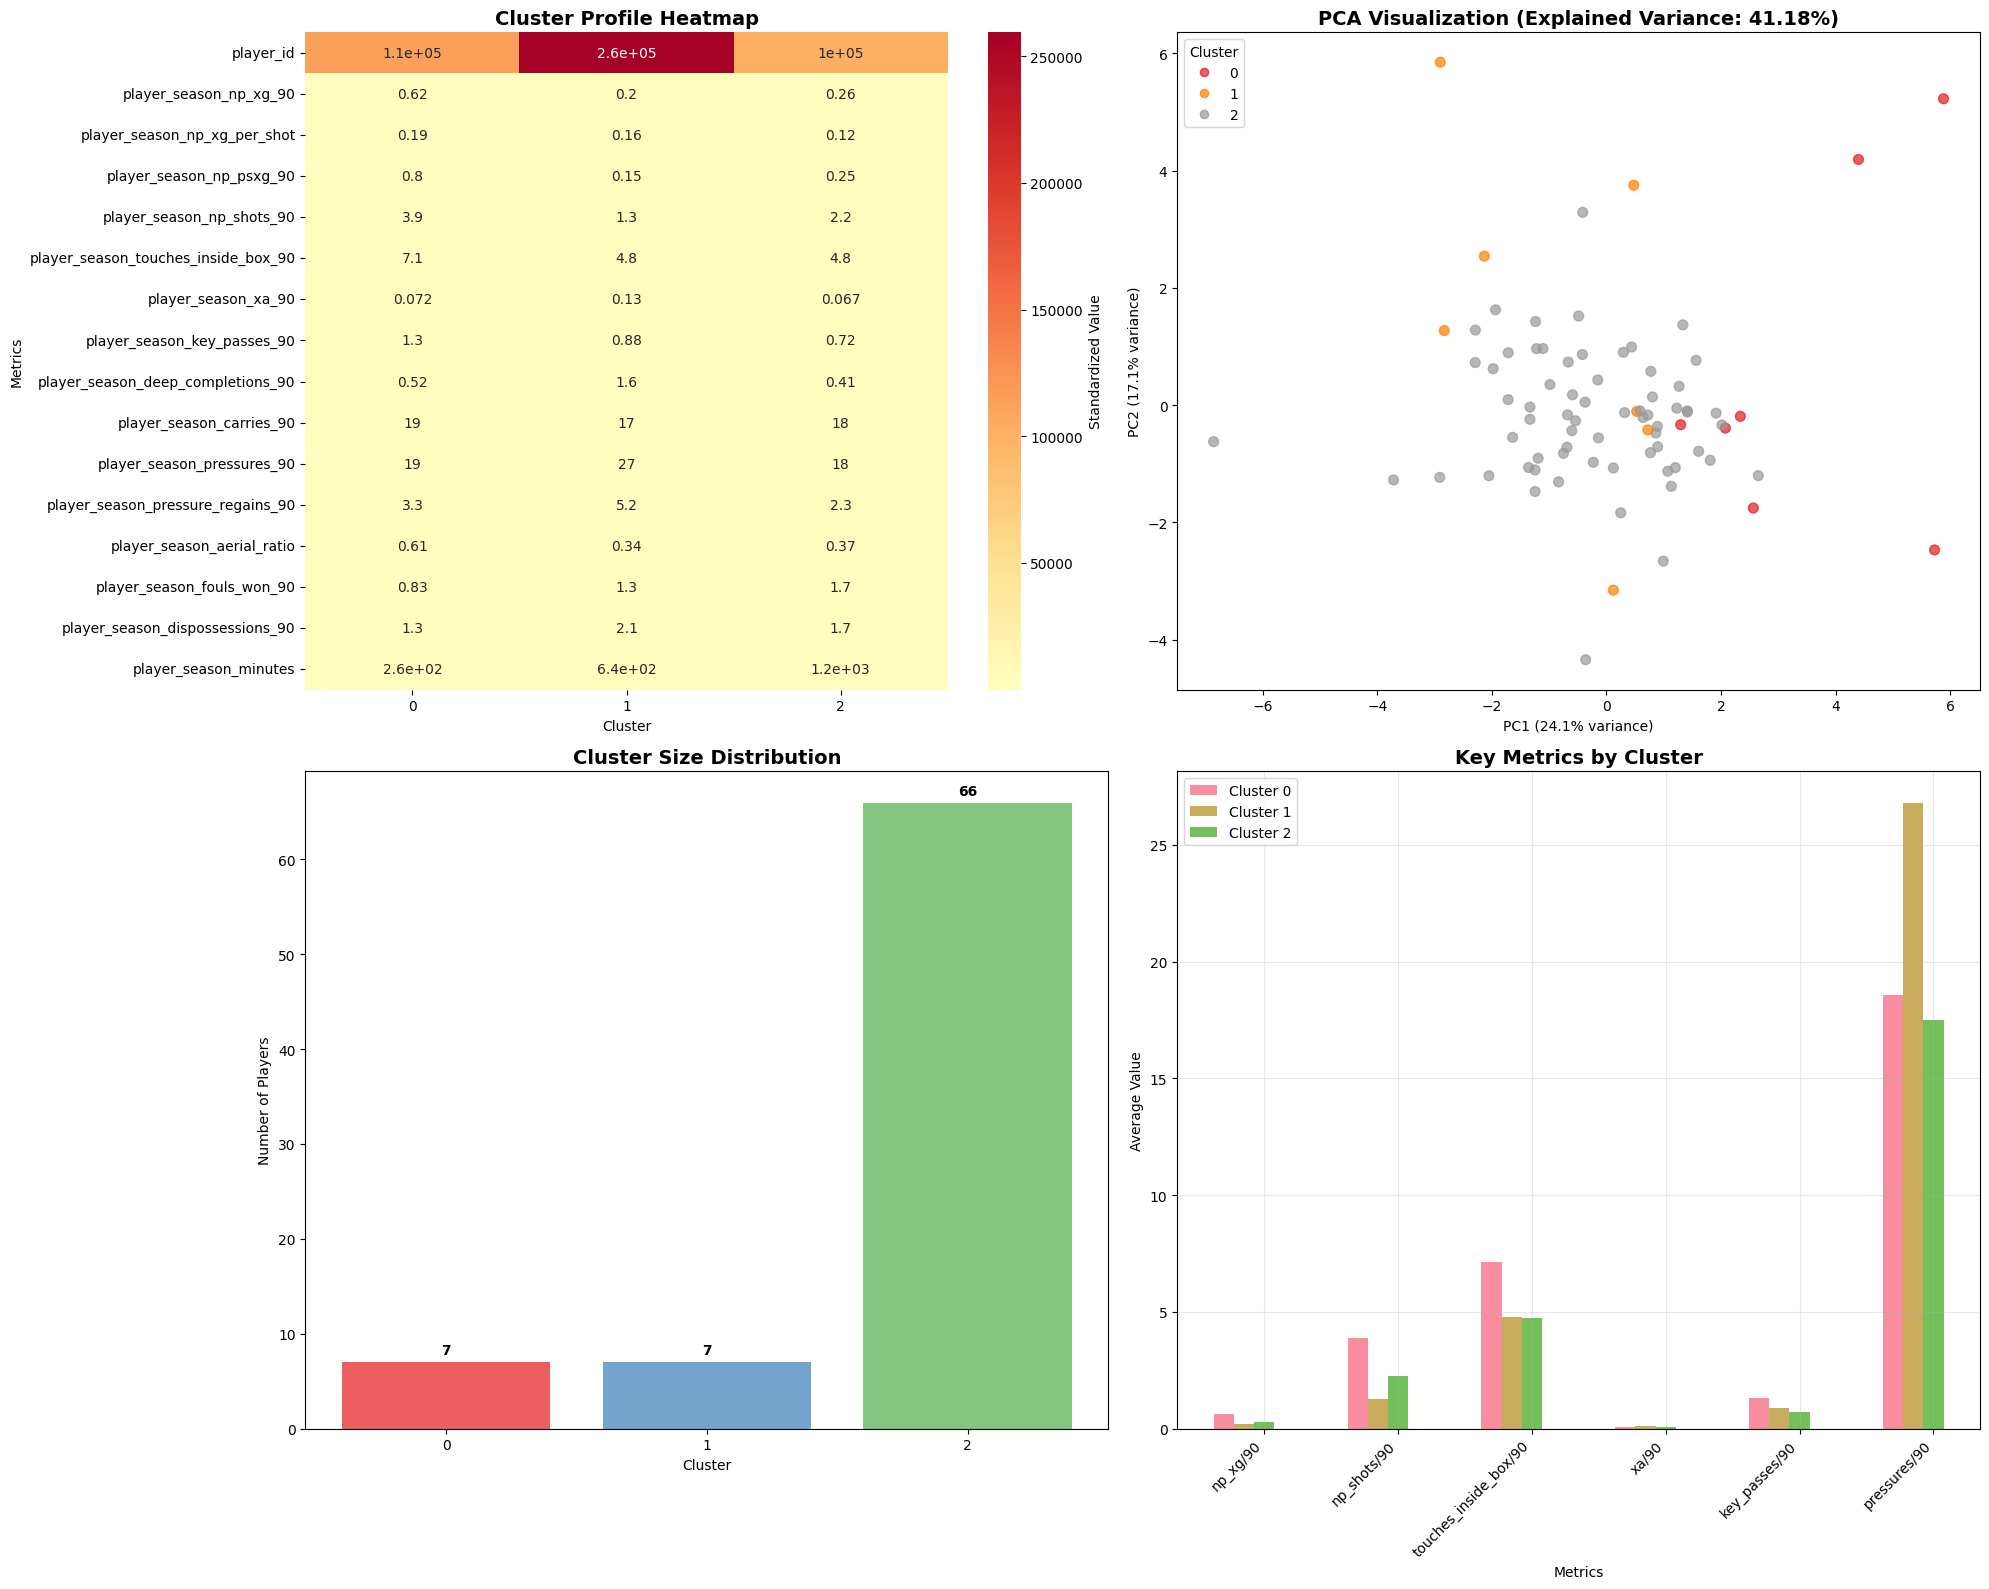


CLUSTER CHARACTERISTICS SUMMARY

CLUSTER 0 (7 players):
------------------------------
Strengths:
  • player_id: 114088.43
  • minutes: 259.20
  • pressures/90: 18.57

Sample players:
  • Lucas Daniel Cavallini (Puebla)
  • Gabriel Matías Fernández Leites (Cruz Azul)
  • Carlos Uriel Antuna Romero (Cruz Azul)

CLUSTER 1 (7 players):
------------------------------
Strengths:
  • player_id: 259404.71
  • minutes: 641.51
  • pressures/90: 26.82

Sample players:
  • Carlos Gabriel González Espínola (Tijuana)
  • Emanuel Ley Reyes (Tijuana)
  • Mateo Levy Mendaña (Cruz Azul)

CLUSTER 2 (66 players):
------------------------------
Strengths:
  • player_id: 101801.47
  • minutes: 1234.20
  • carries/90: 18.26

Sample players:
  • Brandon Vázquez Toledo (Monterrey)
  • Sergio Armando Aguayo Castillo (Pachuca)
  • Samuel Alejandro Sosa Cordero (Querétaro)



In [11]:
# Cluster Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# 1. Heatmap of cluster means
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Heatmap of cluster means
cluster_means = cluster_summary.T
sns.heatmap(cluster_means, annot=True, cmap='RdYlBu_r', center=0, 
            ax=axes[0,0], cbar_kws={'label': 'Standardized Value'})
axes[0,0].set_title('Cluster Profile Heatmap', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Cluster')
axes[0,0].set_ylabel('Metrics')

# 2. PCA Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(striker_core_15_scaled)

scatter = axes[0,1].scatter(pca_result[:, 0], pca_result[:, 1], 
                           c=striker_stats_core_15['cluster'], 
                           cmap='Set1', alpha=0.7, s=50)
axes[0,1].set_title(f'PCA Visualization (Explained Variance: {pca.explained_variance_ratio_.sum():.2%})', 
                   fontsize=14, fontweight='bold')
axes[0,1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
axes[0,1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
axes[0,1].legend(*scatter.legend_elements(), title="Cluster", loc='best')

# 3. Cluster Size Distribution
cluster_counts = striker_stats_core_15['cluster'].value_counts().sort_index()
bars = axes[1,0].bar(cluster_counts.index, cluster_counts.values, 
                     color=sns.color_palette("Set1", 5), alpha=0.7)
axes[1,0].set_title('Cluster Size Distribution', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Cluster')
axes[1,0].set_ylabel('Number of Players')
axes[1,0].set_xticks(cluster_counts.index)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# 4. Top Metrics by Cluster (Radar Chart Style - using bar chart for clarity)
# Select key metrics for visualization
key_metrics = ['player_season_np_xg_90', 'player_season_np_shots_90', 
               'player_season_touches_inside_box_90', 'player_season_xa_90',
               'player_season_key_passes_90', 'player_season_pressures_90']

x = np.arange(len(key_metrics))
width = 0.15

for i, cluster in enumerate(sorted(cluster_summary.index)):
    values = [cluster_summary.loc[cluster, metric] for metric in key_metrics]
    axes[1,1].bar(x + i*width, values, width, label=f'Cluster {cluster}', alpha=0.8)

axes[1,1].set_title('Key Metrics by Cluster', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Metrics')
axes[1,1].set_ylabel('Average Value')
axes[1,1].set_xticks(x + width * 2)
axes[1,1].set_xticklabels([m.replace('player_season_', '').replace('_90', '/90') 
                          for m in key_metrics], rotation=45, ha='right')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print cluster characteristics
print("\n" + "="*60)
print("CLUSTER CHARACTERISTICS SUMMARY")
print("="*60)

for cluster in sorted(cluster_summary.index):
    cluster_data = striker_stats_core_15[striker_stats_core_15['cluster'] == cluster]
    print(f"\nCLUSTER {cluster} ({len(cluster_data)} players):")
    print("-" * 30)
    
    # Top 3 metrics where this cluster excels
    cluster_means_scaled = cluster_summary.loc[cluster]
    top_metrics = cluster_means_scaled.nlargest(3).index
    print("Strengths:")
    for metric in top_metrics:
        value = cluster_means_scaled[metric]
        print(f"  • {metric.replace('player_season_', '').replace('_90', '/90')}: {value:.2f}")
    
    # Show some player examples
    if len(cluster_data) > 0:
        sample_players = cluster_data[['player_name', 'team_name']].head(3)
        print("\nSample players:")
        for _, player in sample_players.iterrows():
            print(f"  • {player['player_name']} ({player['team_name']})")

print("\n" + "="*60)


In [12]:
target = "player_season_obv_90"



features = [col for col in striker_stats.columns
            if col not in ['player_id', 'player_name', 'team_name', 'primary_position', 'secondary_position', target, 'cluster',
            'player_season_minutes',
            'player_season_90s_played']
            and "obv" not in col.lower()
            ]

features

['player_season_goals_90',
 'player_season_npg_90',
 'player_season_np_xg_90',
 'player_season_np_xg_per_shot',
 'player_season_conversion_ratio',
 'player_season_shot_on_target_ratio',
 'player_season_np_psxg_90',
 'player_season_npga_90',
 'player_season_npxgxa_90',
 'player_season_np_shots_90',
 'player_season_carries_90',
 'player_season_carry_length',
 'player_season_total_dribbles_90',
 'player_season_dribbles_90',
 'player_season_failed_dribbles_90',
 'player_season_touches_inside_box_90',
 'player_season_passes_into_box_90',
 'player_season_op_passes_into_box_90',
 'player_season_op_passes_into_and_touches_inside_box_90',
 'player_season_xa_90',
 'player_season_op_xa_90',
 'player_season_sp_xa_90',
 'player_season_key_passes_90',
 'player_season_op_key_passes_90',
 'player_season_sp_key_passes_90',
 'player_season_through_balls_90',
 'player_season_xgbuildup_90',
 'player_season_xgchain_90',
 'player_season_deep_progressions_90',
 'player_season_deep_completions_90',
 'player_s

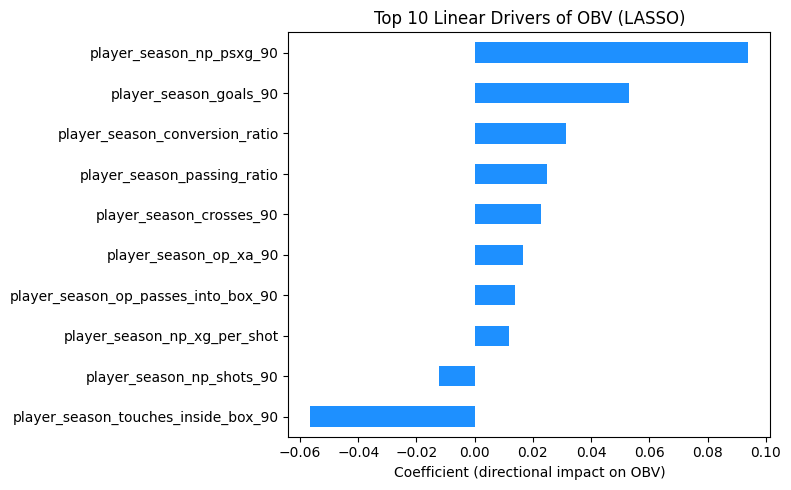

player_season_np_psxg_90               0.094000
player_season_touches_inside_box_90   -0.056422
player_season_goals_90                 0.052941
player_season_conversion_ratio         0.031474
player_season_passing_ratio            0.024935
player_season_crosses_90               0.022895
player_season_op_xa_90                 0.016559
player_season_op_passes_into_box_90    0.013794
player_season_np_shots_90             -0.012339
player_season_np_xg_per_shot           0.011650
dtype: float64

In [13]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd
import matplotlib.pyplot as plt

# Define target and features

X = striker_stats[features].select_dtypes("number").fillna(0)
y = striker_stats[target].fillna(0)

# Train LASSO with cross-validation
lasso = make_pipeline(StandardScaler(), LassoCV(cv=5, random_state=42, max_iter=10000))
lasso.fit(X, y)

# Extract non-zero coefficients
lasso_importance = pd.Series(lasso[-1].coef_, index=X.columns)
lasso_importance = lasso_importance[lasso_importance != 0].sort_values(key=abs, ascending=False)

# Show top 10 drivers
lasso_top = lasso_importance.head(10)

plt.figure(figsize=(8,5))
lasso_top.sort_values().plot(kind='barh', color='dodgerblue')
plt.title("Top 10 Linear Drivers of OBV (LASSO)")
plt.xlabel("Coefficient (directional impact on OBV)")
plt.tight_layout()
plt.show()

display(lasso_top)

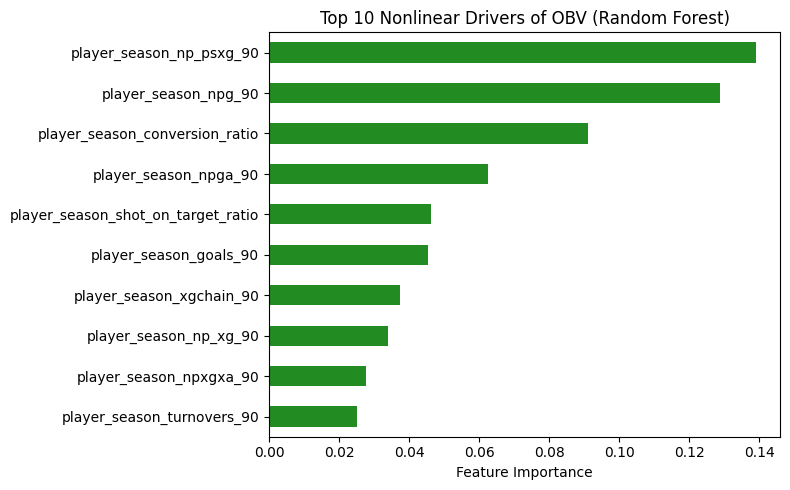

player_season_np_psxg_90              0.139032
player_season_npg_90                  0.128871
player_season_conversion_ratio        0.091180
player_season_npga_90                 0.062575
player_season_shot_on_target_ratio    0.046374
player_season_goals_90                0.045387
player_season_xgchain_90              0.037325
player_season_np_xg_90                0.033907
player_season_npxgxa_90               0.027549
player_season_turnovers_90            0.025052
dtype: float64

In [14]:
# === Random Forest: Capture nonlinear drivers of OBV ===
from sklearn.ensemble import RandomForestRegressor

# Prepare data (same X, y as before)
X = striker_stats[features].select_dtypes("number").fillna(0)
y = striker_stats[target].fillna(0)

rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X, y)

# Extract feature importances
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
rf_top = rf_importance.head(10)

plt.figure(figsize=(8,5))
rf_top.sort_values().plot(kind='barh', color='forestgreen')
plt.title("Top 10 Nonlinear Drivers of OBV (Random Forest)")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

display(rf_top)


⚠️ Duplicate feature columns detected in X. They will be averaged in the comparison.


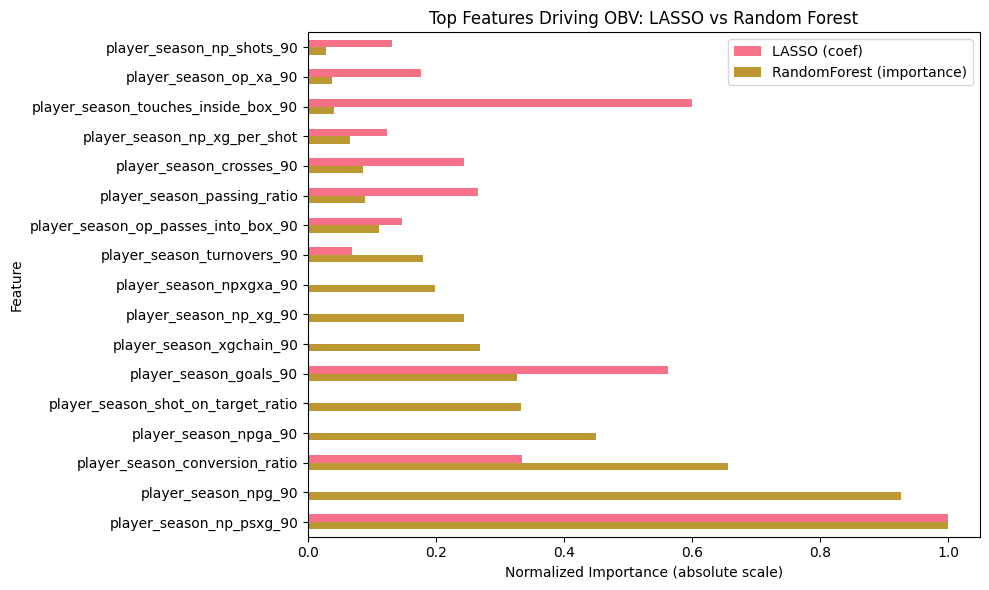

🔁 Common top features in both models (3): ['player_season_np_psxg_90', 'player_season_goals_90', 'player_season_conversion_ratio']


In [15]:
# === Compare LASSO vs Random Forest results (robust to duplicate feature names) ===
import pandas as pd
import matplotlib.pyplot as plt

# 0) Optional: quick diagnostics for duplicates
dup_cols_in_X = pd.Index(X.columns)
if dup_cols_in_X.has_duplicates:
    print("⚠️ Duplicate feature columns detected in X. They will be averaged in the comparison.")
    # If you want to remove duplicates upstream:
    # X = X.loc[:, ~X.columns.duplicated(keep="first")]

# 1) Collapse any duplicate indices by averaging their importances
lasso_imp_unique = lasso_importance.groupby(level=0).mean()
rf_imp_unique    = rf_importance.groupby(level=0).mean()

# 2) Combine safely with concat (aligned on feature name index)
compare = pd.concat(
    [lasso_imp_unique.rename("LASSO (coef)"),
     rf_imp_unique.rename("RandomForest (importance)")],
    axis=1
).fillna(0)

# 3) Normalize columns for visually comparable bars (abs for LASSO to compare magnitude)
compare_norm = compare.copy()
if compare_norm["LASSO (coef)"].abs().max() > 0:
    compare_norm["LASSO (coef)"] = compare_norm["LASSO (coef)"].abs() / compare_norm["LASSO (coef)"].abs().max()
if compare_norm["RandomForest (importance)"].max() > 0:
    compare_norm["RandomForest (importance)"] = compare_norm["RandomForest (importance)"] / compare_norm["RandomForest (importance)"].max()

# 4) Restrict plot to top 10 unique features across both models (by each model’s ranking)
lasso_top10 = lasso_imp_unique.abs().sort_values(ascending=False).head(10).index
rf_top10    = rf_imp_unique.sort_values(ascending=False).head(10).index
top_features = list(pd.Index(lasso_top10).union(rf_top10))

compare_plot = compare_norm.loc[top_features].sort_values("RandomForest (importance)", ascending=True)

# 5) Plot
plt.figure(figsize=(10, 6))
compare_plot.plot(kind='barh', ax=plt.gca())
plt.title("Top Features Driving OBV: LASSO vs Random Forest")
plt.xlabel("Normalized Importance (absolute scale)")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.legend()
plt.tight_layout()
plt.show()

# 6) Overlap report
overlap = pd.Index(lasso_top10).intersection(rf_top10)
print(f"🔁 Common top features in both models ({len(overlap)}): {list(overlap)}")


In [16]:
selected_features = [
    # --- Finishing style (behavioral) ---
    "player_season_np_shots_90",            # shooting tendency / volume
    "player_season_np_xg_per_shot",         # shot selection quality
    "player_season_shot_on_target_ratio",   # shooting discipline / accuracy
    
    # --- Finishing volume & attacking presence ---
    "player_season_np_xg_90",               # how often player gets into scoring positions
    "player_season_key_passes_90",          # creative passing (shot assists)
    
    # --- Attacking involvement & buildup ---
    "player_season_op_passes_into_box_90",  # open-play box passes
    "player_season_deep_progressions_90",   # forward progressions (passes/carries)
    "player_season_dribbles_90",            # on-ball attacking activity
    
    # --- Possession security ---         # technical reliability
    "player_season_op_passes_90",              # passing volume
    "player_season_receiving_success_90",   # hold-up ability / pressure resistance
    
    # --- Physical profile ---
    "player_season_aerial_wins_90",         # aerial / physical strength
]


available_features = [c for c in selected_features if c in striker_stats.columns]
missing = sorted(set(selected_features) - set(available_features))
if missing:
    print("⚠️ Missing in striker_stats (will be skipped):", missing)

#identifier columns
id_cols = [c for c in ["player_id", "player_name", "team_name"] if c in striker_stats.columns]

# 4) Build the filtered view (absolute values)
striker_curated_abs = striker_stats[id_cols + available_features].copy()

# 5) Standardize feature columns for clustering
X = striker_curated_abs[available_features].astype(float).fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6) Convenient DataFrame versions to use downstream
striker_curated_scaled = pd.concat(
    [striker_curated_abs[id_cols],
     pd.DataFrame(X_scaled, columns=available_features, index=striker_curated_abs.index)],
    axis=1
)

print(f"✅ Ready for clustering: {striker_curated_scaled.shape[0]} players × {len(available_features)} features")
display(striker_curated_scaled.head())



⚠️ Missing in striker_stats (will be skipped): ['player_season_receiving_success_90']
✅ Ready for clustering: 80 players × 10 features


,player_id,player_name,team_name,player_season_np_shots_90,player_season_np_xg_per_shot,player_season_shot_on_target_ratio,player_season_np_xg_90,player_season_key_passes_90,player_season_op_passes_into_box_90,player_season_deep_progressions_90,player_season_dribbles_90,player_season_op_passes_90,player_season_aerial_wins_90
9,17299,Brandon Vázquez Toledo,Monterrey,0.196011,0.186395,0.560090,0.352292,-0.454657,0.444605,-0.317731,0.706816,-0.282705,0.345041
10,422617,Sergio Armando Aguayo Castillo,Pachuca,1.082812,-0.689753,-0.642273,-0.087955,0.155357,-1.091960,0.129280,-1.016272,-0.040623,0.864788
15,30452,Samuel Alejandro Sosa Cordero,Querétaro,-0.637049,-0.206688,0.066813,-0.618386,0.618382,-0.047759,0.124874,0.501635,-0.504594,-0.597256
17,11162,Jhonder Leonel Cádiz Fernández,León,1.071931,-0.178677,0.290513,0.608283,0.013316,-0.280095,-0.387262,-0.510485,-0.371888,1.916149
18,4041,José Salomón Rondón Giménez,Pachuca,0.691254,0.160390,-0.100031,0.748928,0.152373,0.842785,0.376107,0.451093,0.187083,-0.164954


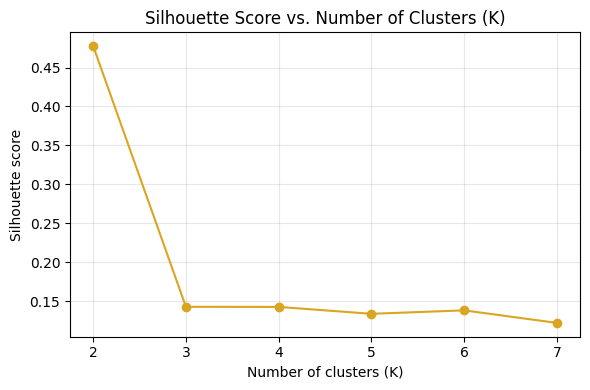

✅ Optimal number of clusters based on silhouette score: K = 2
🔹 Cluster Summary (feature means):


,player_season_np_shots_90,player_season_np_xg_per_shot,player_season_shot_on_target_ratio,player_season_np_xg_90,player_season_key_passes_90,player_season_op_passes_into_box_90,player_season_deep_progressions_90,player_season_dribbles_90,player_season_op_passes_90,player_season_aerial_wins_90
cluster,,,,,,,,,,
0,1.671,0.112,0.323,0.177,0.621,0.308,1.536,0.640,15.943,1.297
1,2.930,0.149,0.443,0.400,0.844,0.360,1.257,0.455,14.898,2.259
2,2.350,0.118,0.408,0.265,1.832,1.434,5.160,1.212,34.066,0.732



Player counts per cluster:


cluster
0    38
1    38
2     4
Name: count, dtype: int64


Example players per cluster:


C:\Users\carls\AppData\Local\Temp\ipykernel_27136\2078370121.py:57: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g[["player_name", "team_name"]].head(3))


player_name      team_name
cluster                                                   
0       15    Samuel Alejandro Sosa Cordero      Querétaro
        20       Anthony Rubén Lozano Colón  Santos Laguna
        21                    Uroš Đurđević          Atlas
1       9            Brandon Vázquez Toledo      Monterrey
        10   Sergio Armando Aguayo Castillo        Pachuca
        17   Jhonder Leonel Cádiz Fernández           León
2       72            Luis Enrique Quiñónes         Puebla
        159          Kevin Castañeda Vargas        Tijuana
        162      Carlos Uriel Antuna Romero      Cruz Azul

In [17]:
from sklearn.metrics import silhouette_score

# 1️⃣ Select feature matrix (exclude identifiers)
feature_cols = [c for c in striker_curated_scaled.columns if c not in id_cols]
X_cluster = striker_curated_scaled[feature_cols].values

# 2️⃣ Evaluate silhouette scores for a range of K
range_k = range(2, 8)  # test cluster counts between 2 and 7
scores = {}
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X_cluster)
    score = silhouette_score(X_cluster, labels)
    scores[k] = score

# 3️⃣ Plot silhouette scores to decide K
plt.figure(figsize=(6, 4))
plt.plot(list(scores.keys()), list(scores.values()), marker='o', color='goldenrod')
plt.title("Silhouette Score vs. Number of Clusters (K)")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette score")
plt.xticks(list(scores.keys()))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4️⃣ Pick best K (highest silhouette score)
best_k = max(scores, key=scores.get)
print(f"✅ Optimal number of clusters based on silhouette score: K = {best_k:.0f}")

# 5️⃣ Fit final K-Means model using best_k
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=50)
labels_final = kmeans_final.fit_predict(X_cluster)

# 6️⃣ Attach cluster labels to the absolute (interpretable) dataset
striker_clustered = striker_curated_abs.copy()
striker_clustered["cluster"] = labels_final

# 7️⃣ Cluster-level summary (mean of each feature per cluster)
cluster_summary = (
    striker_clustered.groupby("cluster")[feature_cols]
    .mean()
    .round(3)
    .sort_index()
)

print("🔹 Cluster Summary (feature means):")
display(cluster_summary)

# 8️⃣ Optional: show cluster counts and sample players
cluster_counts = striker_clustered["cluster"].value_counts().sort_index()
print("\nPlayer counts per cluster:")
display(cluster_counts)

sample_view = (
    striker_clustered.groupby("cluster")
    .apply(lambda g: g[["player_name", "team_name"]].head(3))
)
print("\nExample players per cluster:")
display(sample_view)


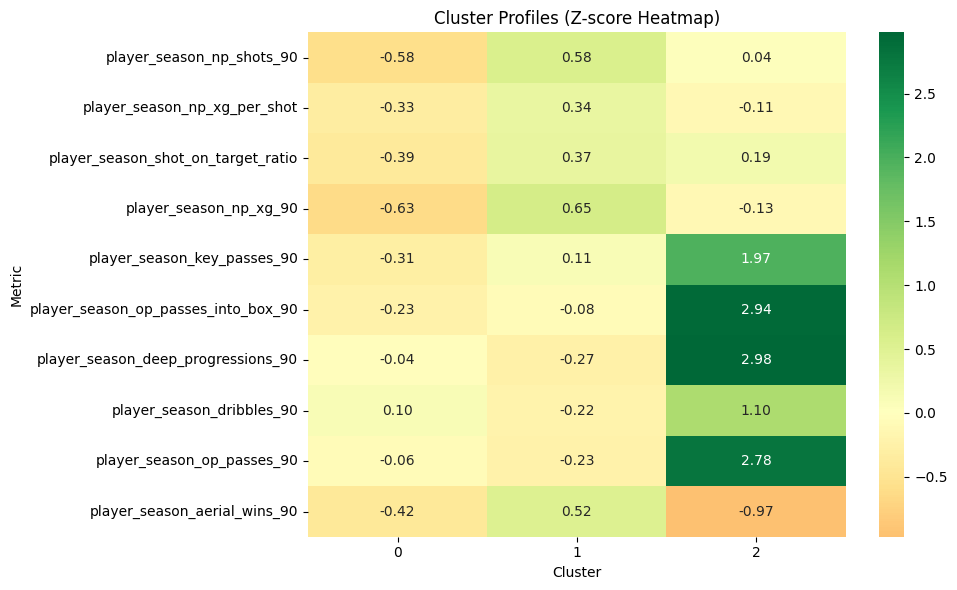

✅ Interpretation: positive values = above-average for that feature; negative = below-average.


,player_season_np_shots_90,player_season_np_xg_per_shot,player_season_shot_on_target_ratio,player_season_np_xg_90,player_season_key_passes_90,player_season_op_passes_into_box_90,player_season_deep_progressions_90,player_season_dribbles_90,player_season_op_passes_90,player_season_aerial_wins_90
cluster,,,,,,,,,,
0,-0.58,-0.33,-0.39,-0.63,-0.31,-0.23,-0.04,0.10,-0.06,-0.42
1,0.58,0.34,0.37,0.65,0.11,-0.08,-0.27,-0.22,-0.23,0.52
2,0.04,-0.11,0.19,-0.13,1.97,2.94,2.98,1.10,2.78,-0.97


In [18]:
# === Visualize striker cluster strengths via z-score heatmap ===
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# 1️⃣ Compute z-scores (standardized values across all players)
feature_cols = [c for c in striker_curated_scaled.columns if c not in ["player_id", "player_name", "team_name", "cluster"]]
X_z = striker_curated_scaled[feature_cols].apply(zscore).fillna(0)

# 2️⃣ Combine z-scored features with cluster labels
X_z["cluster"] = striker_clustered["cluster"].values

# 3️⃣ Compute cluster means in z-score space (shows strengths/weaknesses)
cluster_profiles = X_z.groupby("cluster")[feature_cols].mean().round(2)

# 4️⃣ Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profiles.T, cmap="RdYlGn", center=0, annot=True, fmt=".2f")
plt.title("Cluster Profiles (Z-score Heatmap)")
plt.xlabel("Cluster")
plt.ylabel("Metric")
plt.tight_layout()
plt.show()

print("✅ Interpretation: positive values = above-average for that feature; negative = below-average.")
display(cluster_profiles)


In [19]:
role_labels = {0: "Creator / Link-up", 1: "Finisher / Poacher", 2: "Support / Hybrid"}
striker_clustered["role_label"] = striker_clustered["cluster"].map(role_labels)


In [20]:
for r in striker_clustered["role_label"].unique():
    print(f"\n=== {r} ===")
    display(striker_clustered[striker_clustered["role_label"] == r][["player_name", "team_name"]].head(5))


=== Finisher / Poacher ===


,player_name,team_name
9,Brandon Vázquez Toledo,Monterrey
10,Sergio Armando Aguayo Castillo,Pachuca
17,Jhonder Leonel Cádiz Fernández,León
18,José Salomón Rondón Giménez,Pachuca
26,Franck Boli,Atlético San Luis



=== Creator / Link-up ===


,player_name,team_name
15,Samuel Alejandro Sosa Cordero,Querétaro
20,Anthony Rubén Lozano Colón,Santos Laguna
21,Uroš Đurđević,Atlas
25,Ake Arnaud Loba,Querétaro
32,Adonis Stalin Preciado Quintero,Querétaro



=== Support / Hybrid ===


,player_name,team_name
72,Luis Enrique Quiñónes,Puebla
159,Kevin Castañeda Vargas,Tijuana
162,Carlos Uriel Antuna Romero,Cruz Azul
475,Patricio Salas,América


⚠️ Missing features (ignored): ['player_season_receiving_success_90']
ℹ️ Filling 6 NaN values with column means for PCA.
✅ PCA ready. Explained variance: PC1=29.8%, PC2=21.4%


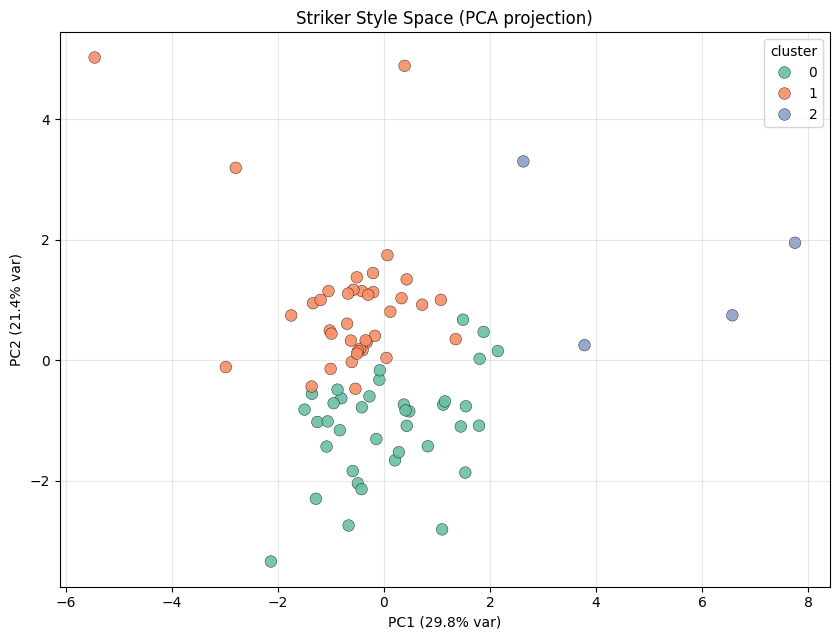


🔎 Top PC1 drivers:


,PC1,PC2
player_season_deep_progressions_90,0.490564,0.138147
player_season_op_passes_into_box_90,0.447415,0.169146
player_season_op_passes_90,0.426690,0.173765
player_season_key_passes_90,0.352246,0.314293
player_season_dribbles_90,0.254042,-0.148636
player_season_np_xg_per_shot,-0.267942,0.322254



🔎 Top PC2 drivers:


,PC1,PC2
player_season_np_xg_90,-0.199085,0.602764
player_season_np_shots_90,0.023177,0.461885
player_season_np_xg_per_shot,-0.267942,0.322254
player_season_key_passes_90,0.352246,0.314293
player_season_shot_on_target_ratio,-0.195050,0.280981
player_season_aerial_wins_90,-0.196160,0.204395



🧭 Example extremes (names to inspect):


,player_name,team_name,PC1,PC2,cluster
230,Jesus Hernandez,Tijuana,-5.453060,5.019891,1
320,Bryan Javier Gamboa Galarza,Cruz Azul,-2.981082,-0.112542,1
461,Illian Gerardo Hernandez Vargas,Pachuca,-2.793080,3.191040,1
159,Kevin Castañeda Vargas,Tijuana,7.747840,1.948675,2
475,Patricio Salas,América,6.566632,0.745687,2
72,Luis Enrique Quiñónes,Puebla,3.781248,0.251105,2
231,Emanuel Ley Reyes,Tijuana,-2.131602,-3.336641,0
408,José Juan Macías Guzmán,Santos Laguna,1.096636,-2.803682,0
551,Diego Hiram Ramírez Martínez,Tigres UANL,-0.665602,-2.739628,0
350,Esteban Lozano Solana,América,0.389459,4.881551,1


In [21]:
# === Robust PCA Cluster Visualization (defensive) ===
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 0) Basic checks
assert "striker_clustered" in globals(), "striker_clustered DataFrame not found."
assert "selected_features" in globals(), "selected_features list not found."

# 1) Figure out which column holds the cluster labels
possible_cluster_cols = ["cluster", "role_label", "cluster_id", "cluster_final"]
cluster_col = next((c for c in possible_cluster_cols if c in striker_clustered.columns), None)
if cluster_col is None:
    raise ValueError(f"No cluster column found. Checked: {possible_cluster_cols}")

# 2) Pick feature columns = intersection of selected_features and striker_clustered
feature_cols = [c for c in selected_features if c in striker_clustered.columns]

missing = sorted(set(selected_features) - set(feature_cols))
if missing:
    print("⚠️ Missing features (ignored):", missing)

if len(feature_cols) < 2:
    raise ValueError(f"Need at least 2 feature columns for PCA; only found {len(feature_cols)}: {feature_cols}")

# 3) Get numeric feature matrix, handle NaNs, drop constant columns
X_raw = striker_clustered[feature_cols].apply(pd.to_numeric, errors="coerce")
nans_before = X_raw.isna().sum().sum()
if nans_before > 0:
    print(f"ℹ️ Filling {nans_before} NaN values with column means for PCA.")
    X_raw = X_raw.apply(lambda col: col.fillna(col.mean()))

# Drop zero-variance columns (PCA can't use them)
std = X_raw.std(axis=0)
constant_cols = std[std == 0].index.tolist()
if constant_cols:
    print("ℹ️ Dropping constant features:", constant_cols)
    X_raw = X_raw.drop(columns=constant_cols)
    feature_cols = [c for c in feature_cols if c not in constant_cols]

if len(feature_cols) < 2:
    raise ValueError(f"After dropping constant features, fewer than 2 remain: {feature_cols}")

# 4) Scale and PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw.values)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

expl_var = pca.explained_variance_ratio_
print(f"✅ PCA ready. Explained variance: PC1={expl_var[0]*100:.1f}%, PC2={expl_var[1]*100:.1f}%")

# 5) Build plotting frame
pca_df = striker_clustered.copy()
pca_df["PC1"] = X_pca[:, 0]
pca_df["PC2"] = X_pca[:, 1]

# 6) Plot
plt.figure(figsize=(8.5, 6.5))
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue=cluster_col,
    s=70, alpha=0.9, edgecolor="k", linewidth=0.3, palette="Set2"
)
plt.title("Striker Style Space (PCA projection)")
plt.xlabel(f"PC1 ({expl_var[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({expl_var[1]*100:.1f}% var)")
plt.grid(alpha=0.3)
plt.legend(title=str(cluster_col), loc="best", frameon=True)
plt.tight_layout()
plt.show()

# 7) Show top loadings for interpretation (which features define each axis)
loadings = pd.DataFrame(pca.components_.T, index=X_raw.columns, columns=["PC1", "PC2"])
# Show the 6 strongest (by absolute loading) per component
top_pc1 = loadings["PC1"].abs().sort_values(ascending=False).head(6).index
top_pc2 = loadings["PC2"].abs().sort_values(ascending=False).head(6).index
print("\n🔎 Top PC1 drivers:")
display(loadings.loc[top_pc1].sort_values("PC1", ascending=False))
print("\n🔎 Top PC2 drivers:")
display(loadings.loc[top_pc2].sort_values("PC2", ascending=False))

# 8) Optional: annotate a few extreme points for quick sanity check
if {"player_name", "team_name"}.issubset(pca_df.columns):
    extremes = pd.concat([
        pca_df.nsmallest(3, "PC1"),
        pca_df.nlargest(3, "PC1"),
        pca_df.nsmallest(3, "PC2"),
        pca_df.nlargest(3, "PC2"),
    ]).drop_duplicates()
    print("\n🧭 Example extremes (names to inspect):")
    display(extremes[["player_name", "team_name", "PC1", "PC2", cluster_col]])
